# Keras Classification

<span class="girk">We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.</span>

![binary.png](attachment:binary.png)

## Import  libraries & data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
df.head()
#Tenure:Number of years for which the customer has been with the bank
#NumOfProducts :Number of bank products the customer is utilising
#Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


![churn.JPG](attachment:churn.JPG)

## Exploratory Data Analysis and Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 13)

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [ ]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

insight sağlamayan columnları dropladık

0    7963
1    2037
Name: Exited, dtype: int64


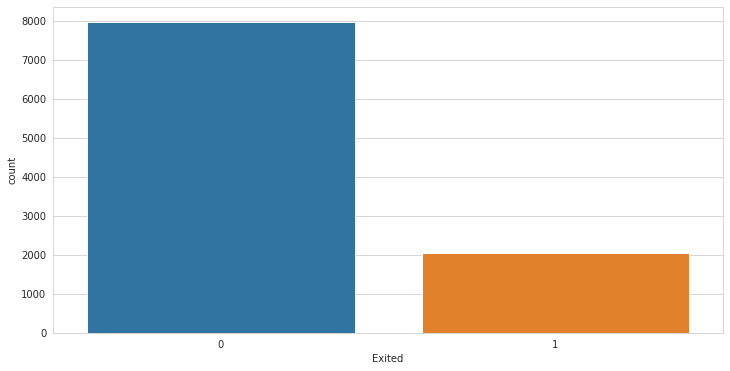

In [ ]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

1'ler churn olanlar yani kaybedilen müşteriler ve datamızın imbalanced old nu görüyoruz

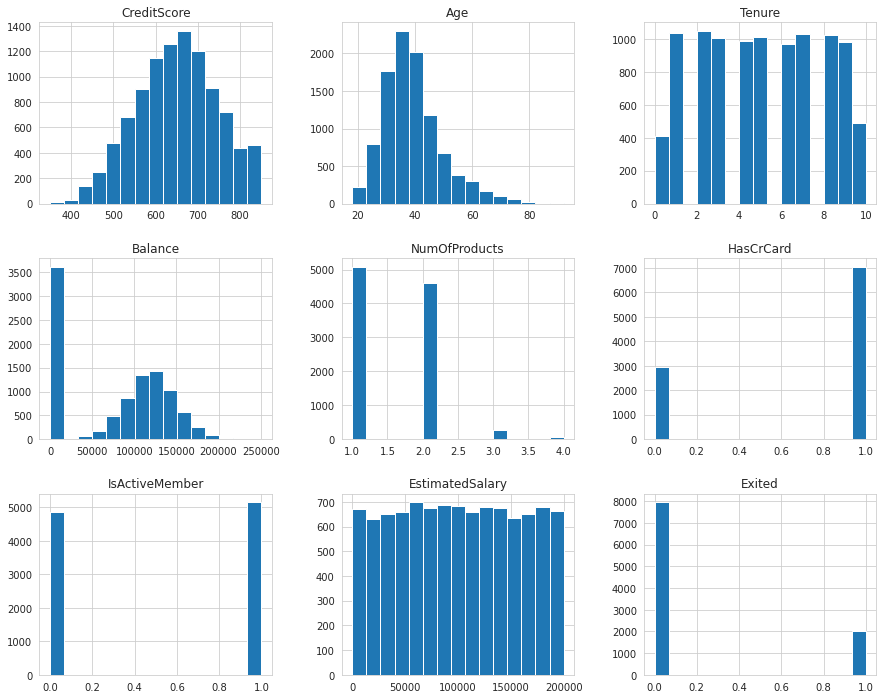

In [ ]:
df.hist(figsize=(15, 12), bins=15);

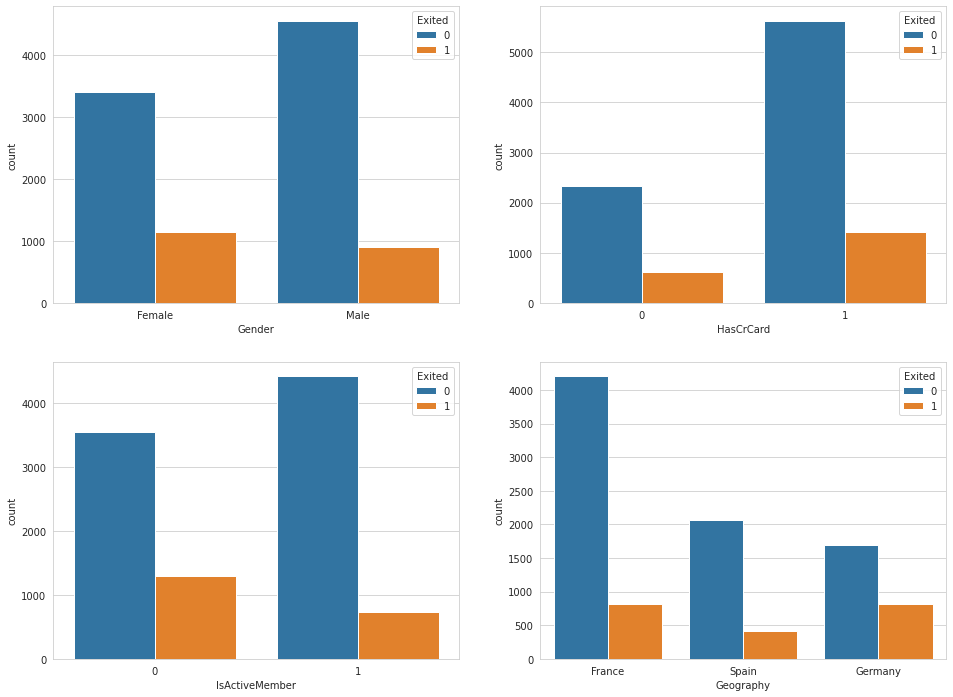

In [ ]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

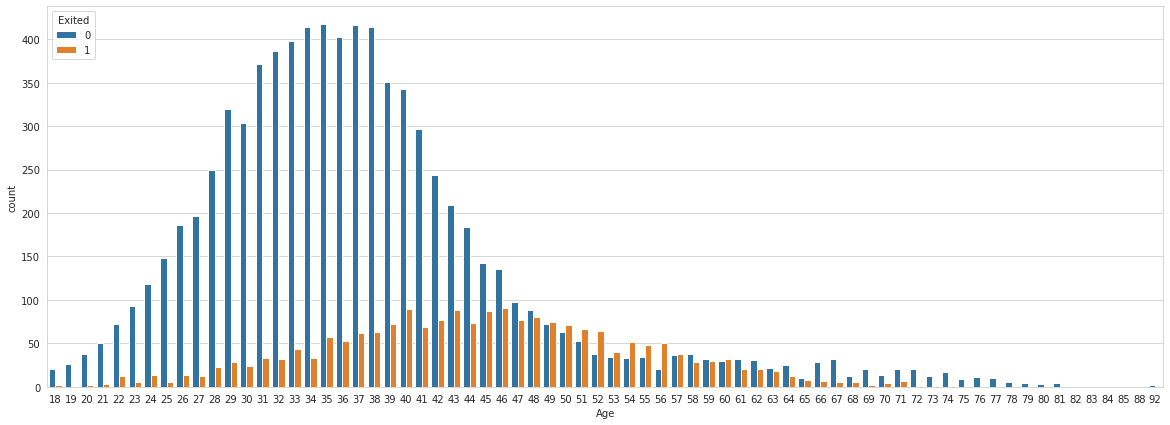

In [ ]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

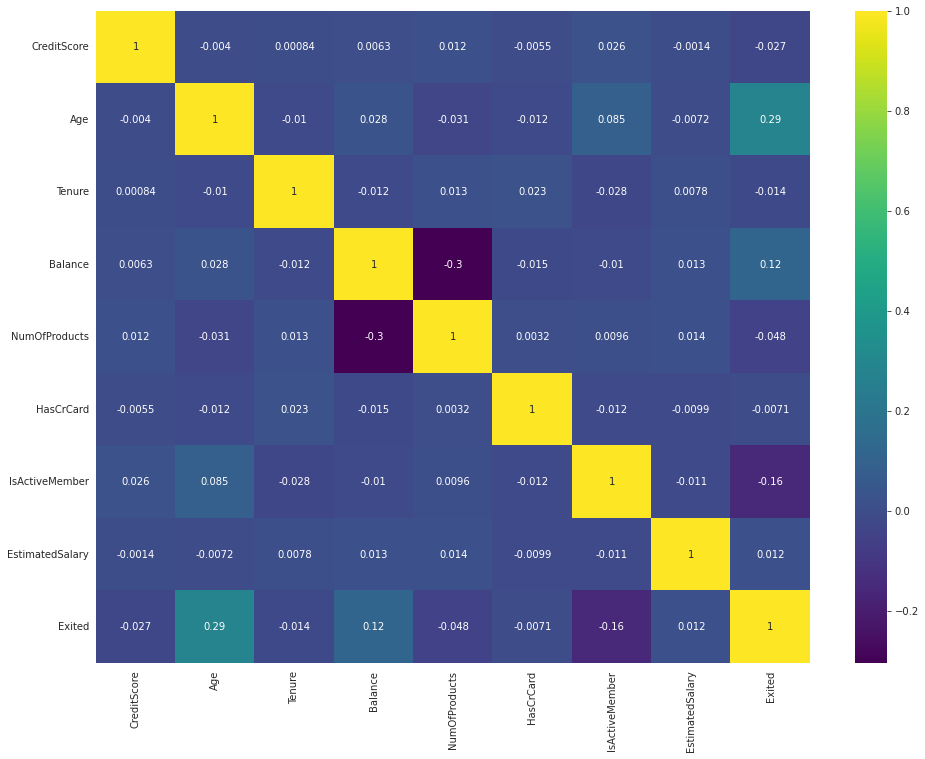

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

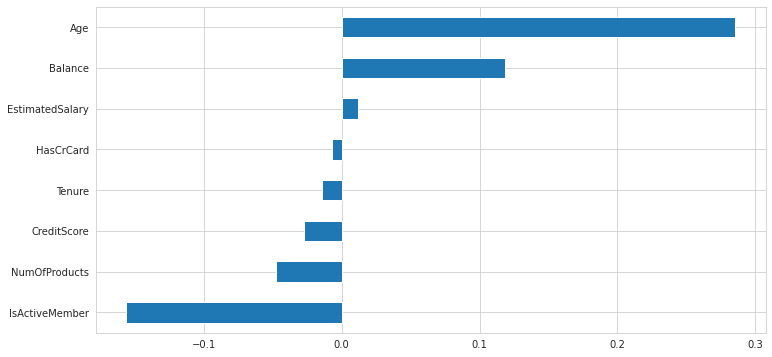

In [ ]:
df.corr()['Exited'][:-1].sort_values().plot.barh()

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


![data%20preprocessing.png](attachment:data%20preprocessing.png)

## Preprocessing of Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)


In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

![Structure-of-machine-learning-model.png](attachment:Structure-of-machine-learning-model.png)

## Modelling & Model Performance

### without class_weigth

In [ ]:
X_train.shape

(9000, 11)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])
# Recall — the percentage of positive cases you caught
# Recall, false negative’in gözardı edilemez olduğu durumlarda önemli bir metrik. recall = TP / TP +FN
# Recall’a bakma sebebimiz tamamiyle paydadaki false negative’ler, yani hesabına devam ettiği tahmin edilen ve hesabını kapatan insanlar. 



arka arkaya sıralı olması için Sequential() diyoruz, DL ANN lerin hepsine Sequential kullanıyoruz.  Dense sayılarında da 2'nin kuvvetlerinden yürüdük. Columns sayısı input sayısı o yüzden 11 tane inputumuz var. sigmoid i binary classification da output için mecbur kullanıyoruz çünkü 0 ya da 1 olması gerekiyor outputumuzun farklı bir değer alamaz 0-1 aralığına sahip old için yani. Diğerlerinin aktivasyon fonksiyonlarını istersek değiştirebiliriz. loss değeri için de "binary_crossentrophy" seçmek zorundayız. Kanser datasında da mesela buradaki gibi recall değeri daha öne çıkıyor accuracy dense çünkü yukarıda da belirtildiği gibi negatif durumlar da önemli. 

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=25)
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
#but it really depends on your dataset and network.

val_loss 25 epoch boyunca düşmezse early stop yap diyoruz, normal loss her türlü epoch sayısı ilerledikçe düşüyor o yüzden val_loss u kullanıyoruz, çünkü val bizim için her zaman test için kullandığımız bir değer. Ayrıca monitor'un default değeri de val_loss 

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/200
64/64 [==============================] - 2s 7ms/step - loss: 0.5154 - recall: 0.0000e+00 - val_loss: 0.4810 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4834 - recall: 0.0000e+00 - val_loss: 0.4621 - val_recall: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4700 - recall: 0.0333 - val_loss: 0.4463 - val_recall: 0.0773
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4595 - recall: 0.0763 - val_loss: 0.4348 - val_recall: 0.1215
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4514 - recall: 0.1205 - val_loss: 0.4237 - val_recall: 0.1657
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4434 - recall: 0.1308 - val_loss: 0.4170 - val_recall: 0.1602
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4374 - recall: 0.1713 - val_loss: 0.4079 - val_recall: 0.2044
Epoch 8/200
64/64 [======

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.515,0.000,0.481,0.000
1,0.483,0.000,0.462,0.000
2,0.470,0.033,0.446,0.077
3,0.459,0.076,0.435,0.122
4,0.451,0.120,0.424,0.166


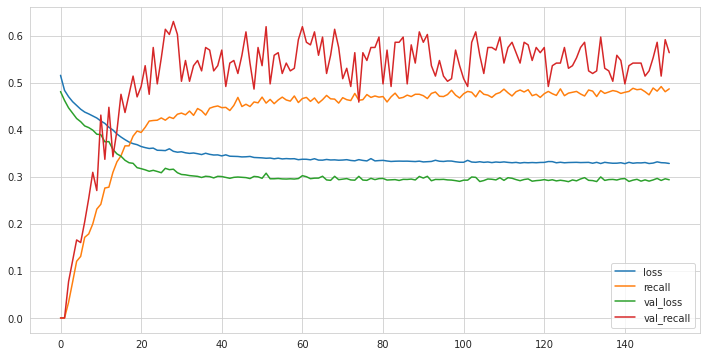

In [ ]:
loss_df.plot();

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 4ms/step
[[761  35]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       796
           1       0.73      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



![ROC.JPG](attachment:ROC.JPG)

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 1ms/step


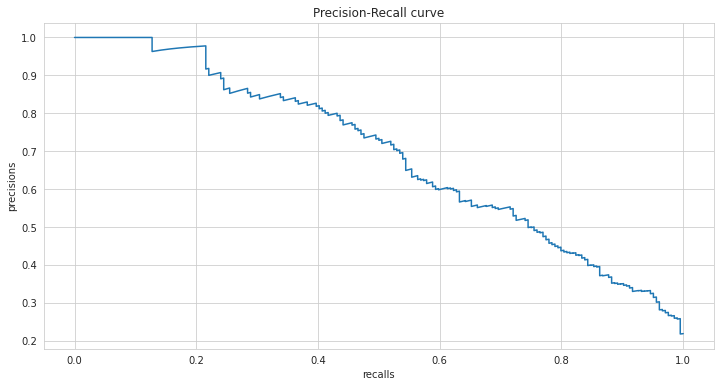

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.691939150605047

![class_weight.jpg](attachment:class_weight.jpg)

### with class_weigth

In [ ]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 1s 7ms/step - loss: 0.6798 - recall: 0.3971 - val_loss: 0.6430 - val_recall: 0.5525
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6435 - recall: 0.6211 - val_loss: 0.6168 - val_recall: 0.7182
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6204 - recall: 0.6640 - val_loss: 0.5729 - val_recall: 0.6740
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6050 - recall: 0.6846 - val_loss: 0.5503 - val_recall: 0.6796
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5929 - recall: 0.6895 - val_loss: 0.5563 - val_recall: 0.7017
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5839 - recall: 0.7004 - val_loss: 0.5001 - val_recall: 0.6188
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5768 - recall: 0.7070 - val_loss: 0.5460 - val_recall: 0.7459
Epoch 8/200
64/64 [======================

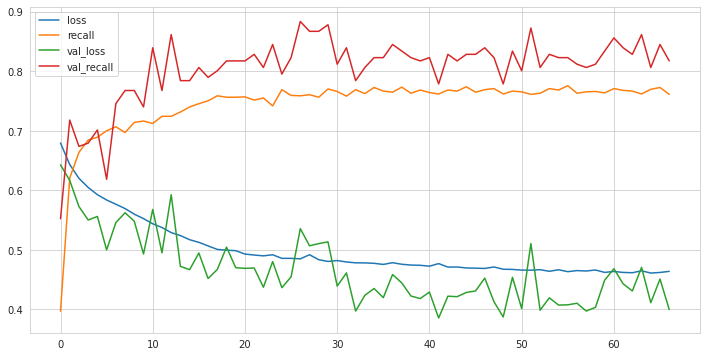

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#      precision    recall  f1-score   support

#  0       0.86      0.97      0.92       796
#  1       0.79      0.41      0.54       204


32/32 [==============================] - 0s 1ms/step
[[632 164]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.48      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.80      1000



![ROC.JPG](attachment:ROC.JPG)

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 1ms/step


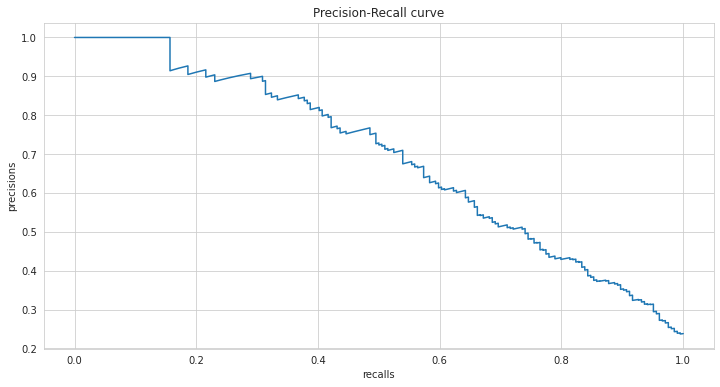

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gösterir

In [ ]:
average_precision_score(y_test, y_pred_proba)   #0.692983743350624

0.6907510922710862

![model.jpeg](attachment:model.jpeg)

## Final Model and Model Deployment

In [ ]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.002)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights)    
# {'batch_size': 256,'learn_rate': 0.003,'optimizer': keras.optimizer_v2.adam.Adam}
# pay attention!! validation data 

Epoch 1/200
36/36 [==============================] - 1s 10ms/step - loss: 0.6838 - recall: 0.3442 - val_loss: 0.6745 - val_recall: 0.5392
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6592 - recall: 0.5499 - val_loss: 0.6586 - val_recall: 0.6127
Epoch 3/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6359 - recall: 0.6399 - val_loss: 0.6436 - val_recall: 0.6471
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6211 - recall: 0.6656 - val_loss: 0.6318 - val_recall: 0.6569
Epoch 5/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6115 - recall: 0.6929 - val_loss: 0.6221 - val_recall: 0.6471
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6018 - recall: 0.6738 - val_loss: 0.6218 - val_recall: 0.6765
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.5913 - recall: 0.7092 - val_loss: 0.5846 - val_recall: 0.6569
Epoch 8/200
36/36 [=====================

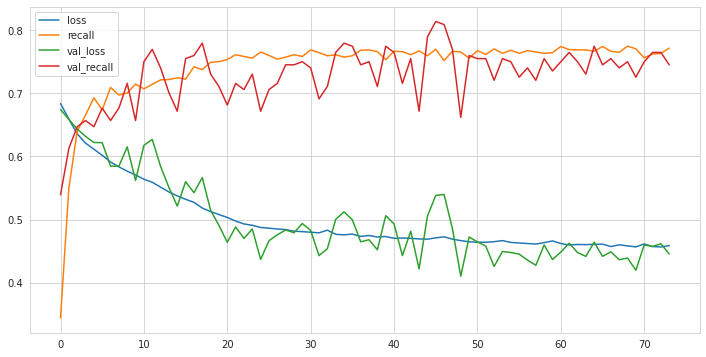

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4454842507839203
recall :  0.7450980544090271


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[627 169]
 [ 52 152]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.71      1000
weighted avg       0.83      0.78      0.79      1000



In [ ]:
model.save('model_churn.h5')

![What-is-Behavioral-Intent-Prediction.jpg](attachment:What-is-Behavioral-Intent-Prediction.jpg)

### Prediction

In [ ]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 1, dtype: float64

In [ ]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [ ]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 19ms/step


array([[1]], dtype=int32)

In [ ]:
df["Exited"].iloc[0]

1

![header-14.png](attachment:header-14.png)

## Comparison with ML

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558 238]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       796
           1       0.37      0.67      0.47       204

    accuracy                           0.69      1000
   macro avg       0.63      0.69      0.63      1000
weighted avg       0.79      0.69      0.72      1000



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[767  29]
 [119  85]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.42      0.53       204

    accuracy                           0.85      1000
   macro avg       0.81      0.69      0.72      1000
weighted avg       0.84      0.85      0.84      1000



![image.png](attachment:image.png)